In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
# Przygotowanie danych
data = np.sin(np.linspace(0, 100, 1200)*2-10)  # przykładowa funkcja temperatury
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

X, y = create_dataset(data)
X = X.reshape((X.shape[0], X.shape[1], 1))



In [30]:
# Budowa modelu
model = models.Sequential()
model.add(layers.Conv1D(150, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X.shape[1], 1)))
model.add(layers.Dropout(0.2)),
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X.shape[1], 1)))
model.add(layers.Dropout(0.1)),
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.1)),
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1))


In [31]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error')


In [32]:
# Trenowanie modelu
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 2s 18ms/step - loss: 0.2853 - val_loss: 0.1974
Epoch 2/100
30/30 [==============================] - 0s 14ms/step - loss: 0.1592 - val_loss: 0.1551
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.1279 - val_loss: 0.1340
Epoch 4/100
30/30 [==============================] - 0s 12ms/step - loss: 0.1070 - val_loss: 0.1176
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0914 - val_loss: 0.0995
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0794 - val_loss: 0.0917
Epoch 7/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0706 - val_loss: 0.0829
Epoch 8/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0620 - val_loss: 0.0827
Epoch 9/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0562 - val_loss: 0.0730
Epoch 10/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0503 - val_loss: 0.0668

In [33]:
# Zapis modelu
model.save('model_temperatura.h5')



In [34]:
# Predykcje
predictions = model.predict(X)


37/37 [==============================] - 0s 3ms/step


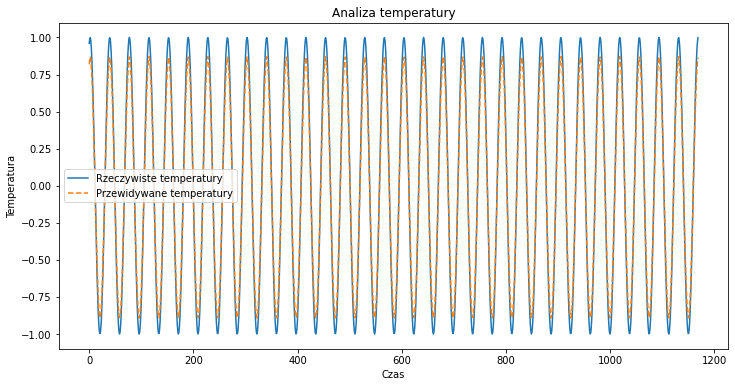

In [35]:
# Wizualizacja wyników
plt.figure(figsize=(12, 6))
plt.plot(y, label='Rzeczywiste temperatury')
plt.plot(predictions, label='Przewidywane temperatury', linestyle='dashed')
plt.title('Analiza temperatury')
plt.xlabel('Czas')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


In [36]:
# Analiza wyników
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0079638483323366


In [37]:
# Prognozowanie temperatury w kolejnych okresach czasowych
last_data = X[-1]  # ostatni wpis
future_predictions = []
for i in range(200):
    pred = model.predict(last_data.reshape(1, -1, 1))
    future_predictions.append(pred[0, 0])
    last_data = np.roll(last_data, -1)
    last_data[-1] = pred


1/1 [==============================] - 0s 18ms/step


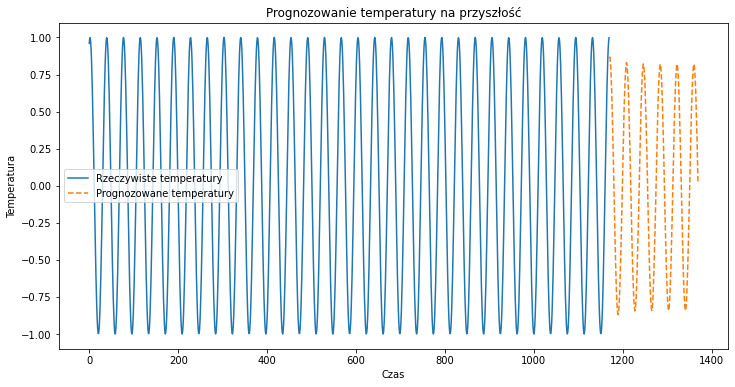

In [38]:
# Wizualizacja prognoz na przyszłość
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label='Rzeczywiste temperatury')
plt.plot(range(len(y), len(y) + 200), future_predictions, label='Prognozowane temperatury', linestyle='dashed')
plt.title('Prognozowanie temperatury na przyszłość')
plt.xlabel('Czas')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 



<Figure size 640x480 with 1 Axes>

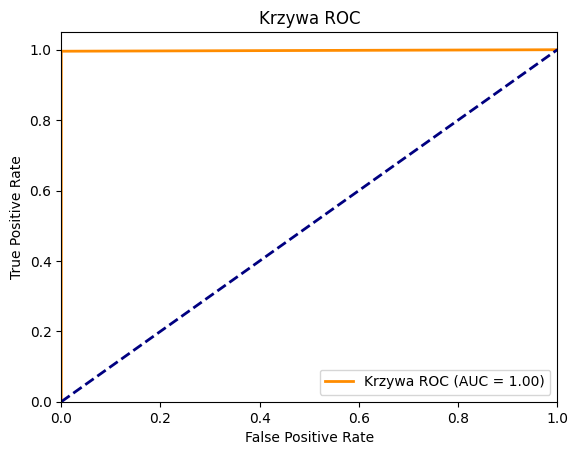

In [56]:
# prompt: dodaj do tego rozwa,żania krzywą ROC

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, roc_curve, auc

# ... (previous code)

# Predykcje
predictions = model.predict(X)

# Dla krzywej ROC potrzebujemy wartości binarne
# Przykładowe progowanie: wszystko powyżej średniej przewidywanej wartości to 1, poniżej to 0
threshold = np.mean(predictions)
y_pred_binary = (predictions > threshold).astype(int)
y_true_binary = (y > threshold).astype(int)


# Obliczanie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)


# Wyświetlanie krzywej ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

# ... (rest of the code)

In [57]:
# prompt: wyznacz wskaźnik R-squared

from sklearn.metrics import r2_score

# Obliczanie wskaźnika R-squared
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9910193033385395
